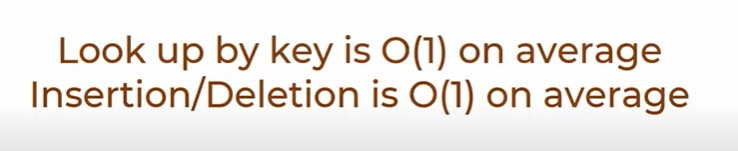

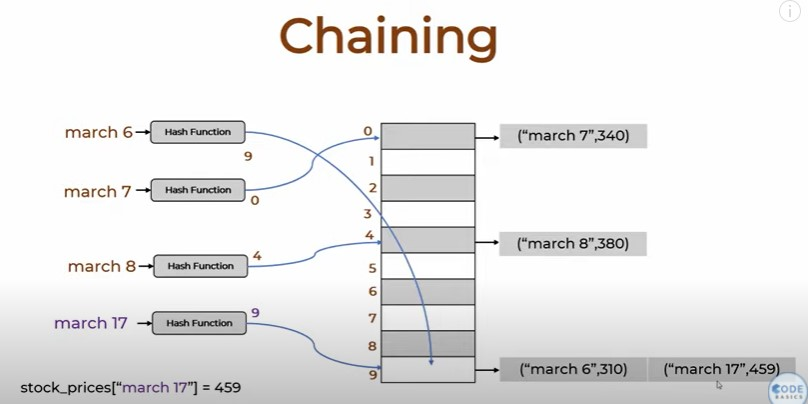

In [1]:
stock_prices = {}
with open('stock_prices.csv','r') as f:
    for line in f:
        tokens = line.split(',')
        day = tokens[0]
        price = float(tokens[1])
        stock_prices[day] = price

In [2]:
stock_prices

{'march 6': 310.0,
 'march 7': 340.0,
 'march 8': 380.0,
 'march 9': 302.0,
 'march 10': 297.0,
 'march 11': 323.0}

In [3]:
stock_prices['march 9']

302.0

### Hashing without Collision

In [1]:
class HashTable:  
    def __init__(self):
        self.MAX = 10
        self.arr = [None for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, index):
        h = self.get_hash(index)
        return self.arr[h]
    
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        self.arr[h] = val    


In [2]:
t = HashTable()
t.get_hash("march 6")

9

In [3]:
t.get_hash("march 17")

9

In [4]:
t["march 6"] = 120
t["march 8"] = 67
t["march 9"] = 4
t["march 17"] = 459
t["march 6"]

459

### Hash Table Collision Handling Using Chaining

In [5]:
class HashTable:  
    def __init__(self):
        self.MAX = 10
        self.arr = [[] for i in range(self.MAX)]
        
    def get_hash(self, key):
        hash = 0
        for char in key:
            hash += ord(char)
        return hash % self.MAX
    
    def __getitem__(self, key):
        arr_index = self.get_hash(key)
        for kv in self.arr[arr_index]:
            if kv[0] == key:
                return kv[1]
            
    def __setitem__(self, key, val):
        h = self.get_hash(key)
        found = False
        for idx, element in enumerate(self.arr[h]):
            if len(element)==2 and element[0] == key:
                self.arr[h][idx] = (key,val)
                found = True
        if not found:
            self.arr[h].append((key,val))
        
    def __delitem__(self, key):
        arr_index = self.get_hash(key)
        for index, kv in enumerate(self.arr[arr_index]):
            if kv[0] == key:
                print("del",index)
                del self.arr[arr_index][index]

In [6]:
t = HashTable()
t["march 6"] = 310
t["march 7"] = 420
t["march 8"] = 67
t["march 17"] = 63457

In [7]:
t.arr

[[('march 7', 420)],
 [('march 8', 67)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('march 6', 310), ('march 17', 63457)]]